# Manipulating images


In [2]:
# Get the data from VisionCog website

! unzip imgOCV.zip

Archive:  imgOCV.zip
replace imgOCV/contours.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: imgOCV/contours.png     
  inflating: imgOCV/foto1B.jpg       
  inflating: imgOCV/blox.jpg         
  inflating: imgOCV/box_in_scene.png  
  inflating: imgOCV/Hawkes_Bay.jpg   
  inflating: imgOCV/coins.jpg        
  inflating: imgOCV/bird.jpg         
  inflating: imgOCV/sudoku.png       
  inflating: imgOCV/box.png          
  inflating: imgOCV/messi5.jpg       
  inflating: imgOCV/phantom.png      
  inflating: imgOCV/fp.png           
  inflating: imgOCV/forest.jpg       
  inflating: imgOCV/messi_face.jpg   
  inflating: imgOCV/foto1A.jpg       
  inflating: imgOCV/fruit.jpg        
  inflating: imgOCV/tsukuba_left.png  
  inflating: imgOCV/tsukuba_right.png  
  inflating: imgOCV/shapesColors.jpg  


In [3]:
# All required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

(240, 256, 3)


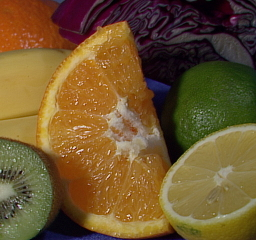

In [4]:
img = cv2.imread("imgOCV/fruit.jpg", 1)

print(img.shape)
cv2_imshow(img)

## Split the color image into three different channels

In [5]:
blueChannel, greenChannel, redChannel = cv2.split(img)

print('blueChannel: ', blueChannel.shape)
print('greenChannel: ', greenChannel.shape)
print('redChannel: ', redChannel.shape)

print('\n')
print('img: ', img.shape)

blueChannel:  (240, 256)
greenChannel:  (240, 256)
redChannel:  (240, 256)


img:  (240, 256, 3)


## Visualize individual channels
- use matplotlib

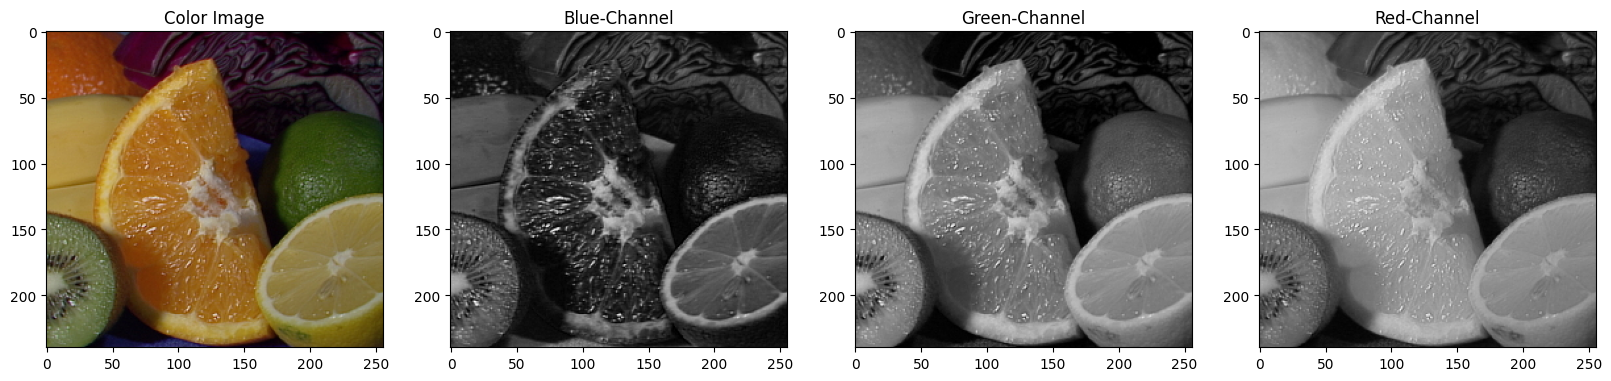

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

fig.set_figheight(20)
fig.set_figwidth(20)

ax1.set_title('Color Image')
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax2.set_title('Blue-Channel')
ax2.imshow(blueChannel, cmap='gray')

ax3.set_title('Green-Channel')
ax3.imshow(greenChannel, cmap='gray')

ax4.set_title('Red-Channel')
ax4.imshow(redChannel, cmap='gray')


# Writing the images

In [7]:
cv2.imwrite??

# Docstring:
# imwrite(filename, img[, params]) -> retval
# .   @brief Saves an image to a specified file.
# .
# .   The function imwrite saves the image to the specified file. The image format is chosen based on the
# .   filename extension (see cv::imread for the list of extensions). In general, only 8-bit
# .   single-channel or 3-channel (with 'BGR' channel order) images
# .   can be saved using this function, with these exceptions:

In [8]:
cv2.imwrite('original.png', img)
cv2.imwrite('blueCH.png', blueChannel)
cv2.imwrite('greenCH.png', greenChannel)
cv2.imwrite('redCH.png', redChannel)

True

## cv2 writing also allows us to compress the images

**JPEG/JPG format**

JPEG uses lossy compression, which means some image data is permanently discarded to achieve a smaller file size.

The JPEG quality can be set to an integer value between 0 and 100.

- 0: Heaviest compression (smallest file size, worst quality).
- 100: Minimal compression (largest file size, highest quality).
- 95: The default quality level used by cv2.imwrite()

In [9]:
cv2.imwrite('compressed_10.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 10])
cv2.imwrite('compressed_100.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 100])

True

In [10]:
! du -sh original.png compressed*.jpg

120K	original.png
60K	compressed_100.jpg
4.0K	compressed_10.jpg


In [11]:
img_C10 = cv2.imread('compressed_10.jpg', 1)
img_C100 = cv2.imread('compressed_100.jpg', 1)

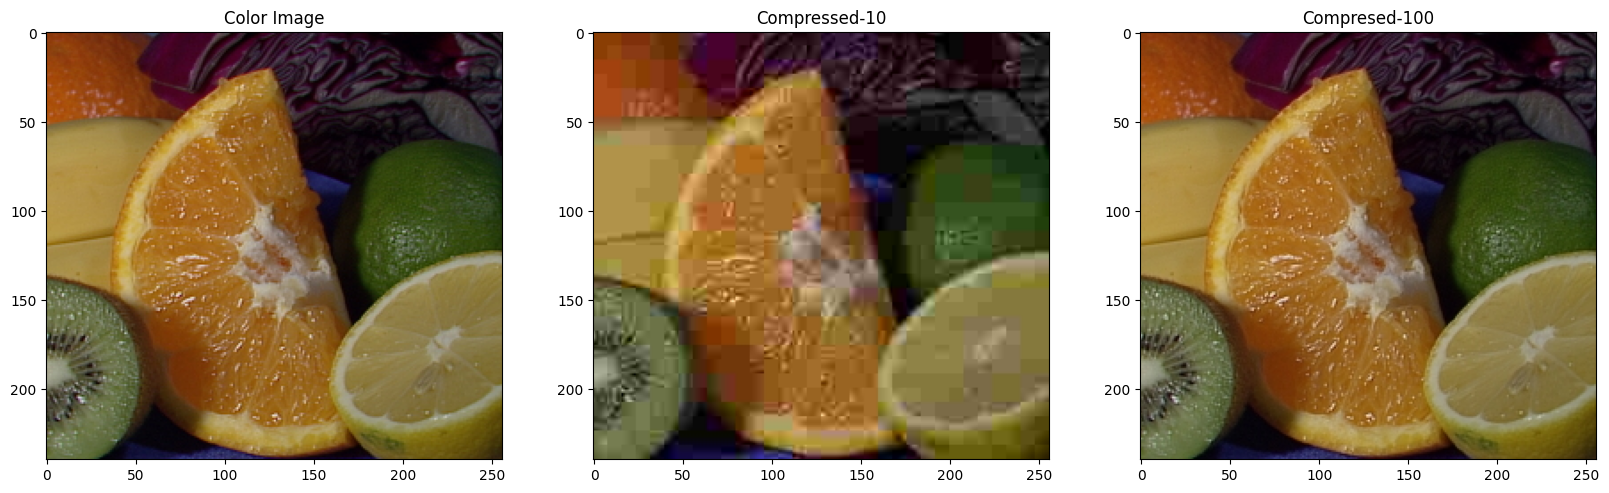

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(20)
fig.set_figwidth(20)

ax1.set_title('Color Image')
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax2.set_title('Compressed-10')
ax2.imshow(cv2.cvtColor(img_C10, cv2.COLOR_BGR2RGB))

ax3.set_title('Compresed-100')
ax3.imshow(cv2.cvtColor(img_C100, cv2.COLOR_BGR2RGB))

**PNG format**

PNG compression is lossless, so the quality of the image remains the same regardless of the compression level. A higher compression level will result in a smaller file size but will take longer to save.

The compression level can be set to an integer value between 0 and 9:

- 0: No compression (fastest save speed, largest file size).
- 9: Maximum compression (slowest save speed, smallest file size).
- 3: The default compression level.

In [14]:
cv2.imwrite('compressedPNG_0.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 0])
cv2.imwrite('compressedPNG_9.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9])
cv2.imwrite('compressedPNG_3.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 3])

True

In [15]:
! du -sh original.png compressed*.png

120K	original.png
184K	compressedPNG_0.png
124K	compressedPNG_3.png
120K	compressedPNG_9.png


In [17]:
img_C0 = cv2.imread('compressedPNG_0.png', 1)
img_C9 = cv2.imread('compressedPNG_9.png', 1)
img_C3 = cv2.imread('compressedPNG_3.png', 1)

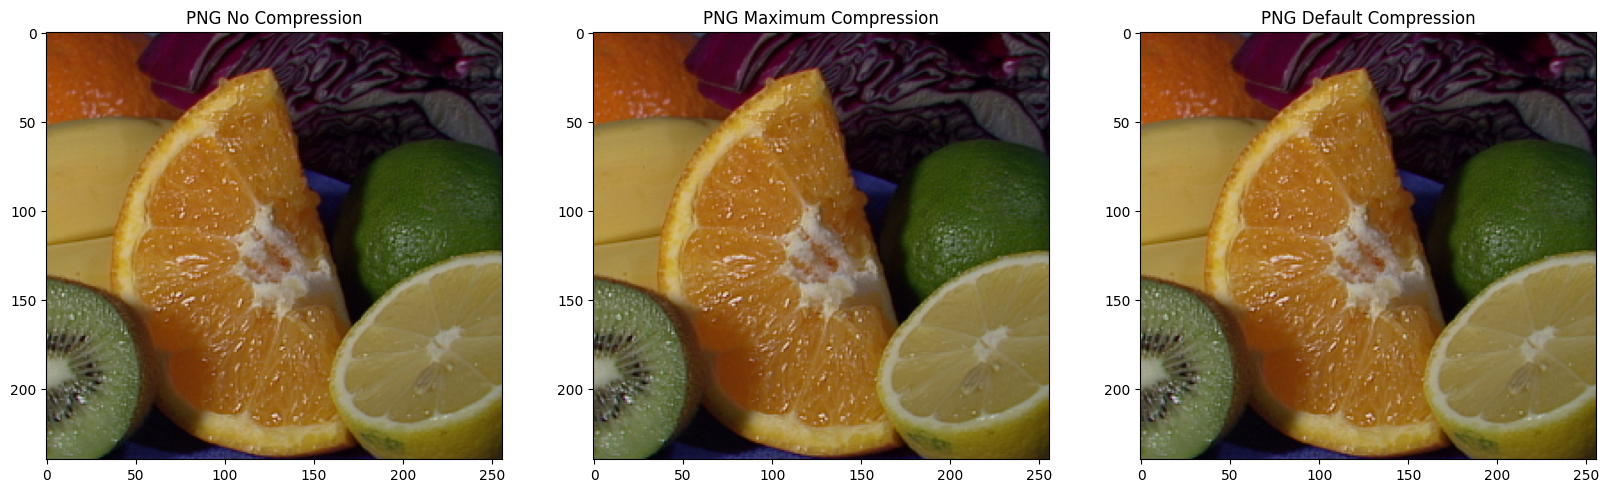

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(20)
fig.set_figwidth(20)

ax1.set_title('PNG No Compression')
ax1.imshow(cv2.cvtColor(img_C0, cv2.COLOR_BGR2RGB))

ax2.set_title('PNG Maximum Compression')
ax2.imshow(cv2.cvtColor(img_C9, cv2.COLOR_BGR2RGB))

ax3.set_title('PNG Default Compression')
ax3.imshow(cv2.cvtColor(img_C3, cv2.COLOR_BGR2RGB))

## Summary: Image Compression \& Saving

- Saving images in OpenCV is done via `cv2.imwrite(filename, img, params)`.

- JPEG compression is controlled by a `cv2.IMWRITE_JPEG_QUALITY` parameter; higher values mean better quality but larger size.

- PNG compression uses `cv2.IMWRITE_PNG_COMPRESSION` (0 = none, up to 9 = max compression, but PNG is lossless).

- JPEG is a lossy format, while PNG is lossless. JPEG compression may reduce visual quality, especially at low quality settings.

- Reducing JPEG quality reduces both filesize and image quality; for PNG, increased compression reduces size without quality loss.

- Always use the appropriate format for your needs: JPEG for web, PNG for transparency/lossless.


## Region of Interest
- Slicing operator on the original image
- Note: It is actually a pointer, and not a copy

In [19]:
# Region of interest

roiImage = img[100:200, 150:250]

(height, width, depth) = roiImage.shape
print("Height %d, Width %d, Depth %d" % (height, width, depth))

Height 100, Width 100, Depth 3


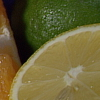

In [20]:
cv2_imshow(roiImage)

In [21]:
# This is a pointer, and copy. So be always careful when handling sliced version.
roiImage[:,:,:] = [255,255,255]

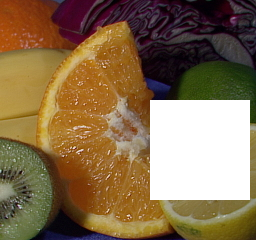

In [22]:
cv2_imshow(img)

## Resize the image

In [23]:
img = cv2.imread("imgOCV/fruit.jpg", 1)
print(img.shape)

(240, 256, 3)


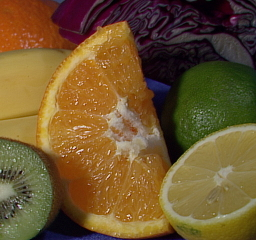

In [24]:
cv2_imshow(img)

In [25]:
# The argument tuple is (width, height)
resizedImage = cv2.resize(img, (200, 100))

print(resizedImage.shape)

(100, 200, 3)


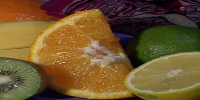

In [26]:
cv2_imshow(resizedImage)

## Resize with aspect ratio

In [27]:
height, width, depth = img.shape

rWidth = 200
aspectRatio = rWidth/width

print(aspectRatio)

0.78125


In [28]:
rHeight = height * aspectRatio
rHeight = int(rHeight)

print(rHeight)


187


In [29]:
resizedImage2 = cv2.resize(img, (rWidth, rHeight))

print(resizedImage2.shape)

(187, 200, 3)


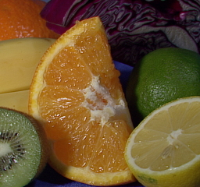

In [30]:
cv2_imshow(resizedImage2)

## Annotations on images

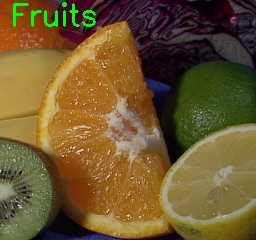

In [31]:
# Annotation

# draw green text on the image
output = img.copy()

cv2.putText(output, "Fruits", (10, 25),
    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


cv2_imshow(output)

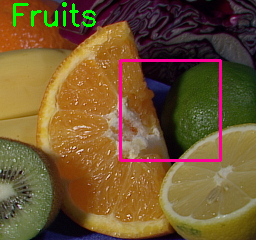

In [32]:

cv2.rectangle(output, (120, 60), (220, 160), (150, 0, 255), 2)

cv2_imshow(output)

# cv2.circle(output, (150, 200), 30, (255, 0, 0), 2)

# cv2.line(output, (100, 20), (100, 200), (0, 0, 255), 2)

# plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

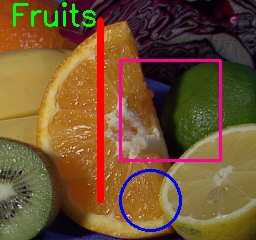

In [33]:

cv2.circle(output, (150, 200), 30, (255, 0, 0), 2)

cv2.line(output, (100, 20), (100, 200), (0, 0, 255), 5)

cv2_imshow(output)
